# Tone Notebook

In [1]:
import warnings
import math
from cmath import log
from random import uniform
from curses import window
from encodings import normalize_encoding
from locale import normalize
from itertools import zip_longest

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import uniform_filter1d

from tonami import pitch_process as pp
from tonami import utils

warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

## Tone 1 Analysis

In [2]:
import math
# load audio files for tone 1
def single_speaker_tone(spkr, tone, sex,  samples=10):
    spkr1_t1_files = utils.get_tone_perfect_audiofiles(tone=tone, spkr=spkr, sex=sex)
    tone1 = []

    counter = 0
    for file in spkr1_t1_files:
        y, sr = librosa.load(file)
        f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=2000)
        if any(x > 1000 for x in f0):
            continue
        if all(math.isnan(x) for x in f0):
            continue
        voiced = pp.voice_activity(f0, voiced_flag)
        tone1.append(voiced)
        plt.plot(voiced, label=file)
        
        counter += 1
        if counter == samples:
            break
    if not tone1:
        print("Can't bad")
    # https://stackoverflow.com/questions/52671807/python-multiple-lists-of-different-lengths-averages-and-standard-deviations
    mean_tone1 = np.nanmean(np.array(list(zip_longest(*tone1)),dtype=float),axis=1)

    plt.plot(mean_tone1, '--', label='mean')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(f'Raw {sex}{spkr}V Tone{tone}')
    plt.savefig(f'spkr{sex}{spkr}_t{tone}.png')
    plt.show()  

    plt.figure(1)
    ax = plt.gca()
    ax.set_ylim([0, 5])
    plt.yticks(np.arange(0, 5, 0.5))

    max_f0, min_f0 = pp.max_min_f0(tone1)
    tone1_normalized = []
    for item in tone1:
        smoothed_f0 = pp.moving_average(item)
        normalized_values = pp.normalize_pitch(smoothed_f0, max_f0, min_f0)
        tone1_normalized.append(normalized_values)
        plt.plot(normalized_values)

    mean_tone1_normalized = np.nanmean(np.array(list(zip_longest(*tone1_normalized)),dtype=float),axis=1)
    plt.plot(mean_tone1_normalized, '--', label='mean')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.title(f'Normalized {sex}{spkr}V Tone{tone}')
    plt.savefig(f'spkr{sex}{spkr}_t{tone}_normalized.png')
    plt.show()



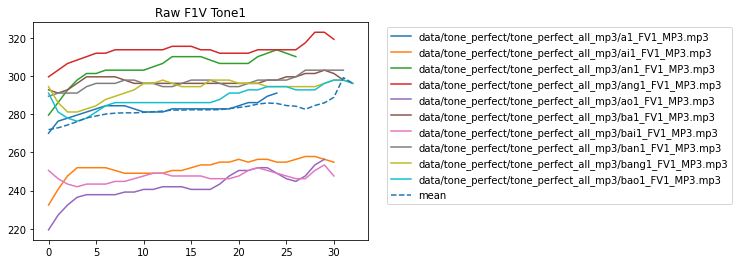

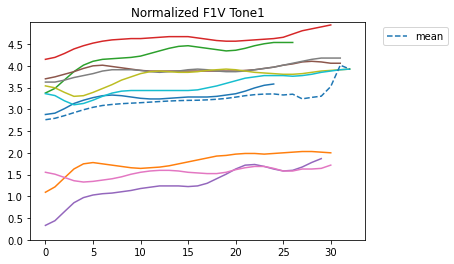

In [3]:
# tone 1
single_speaker_tone(1, 1, 'F')

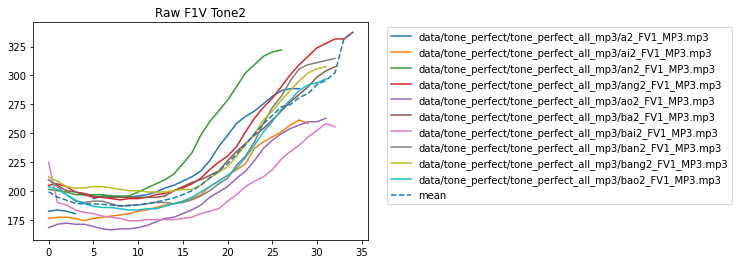

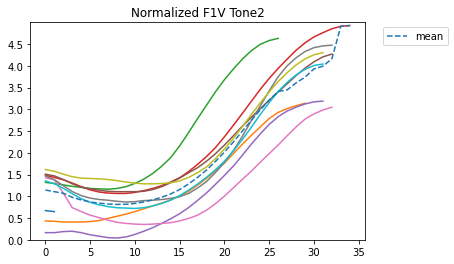

In [4]:
# tone 2
single_speaker_tone(1, 2, 'F')

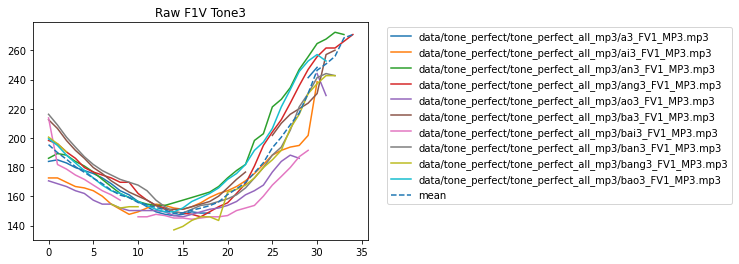

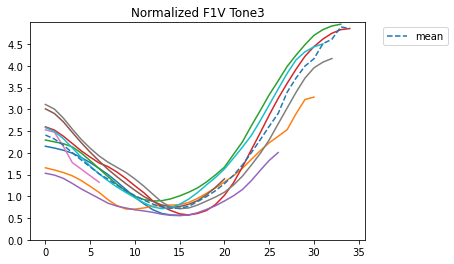

In [5]:
single_speaker_tone(1, 3, 'F')

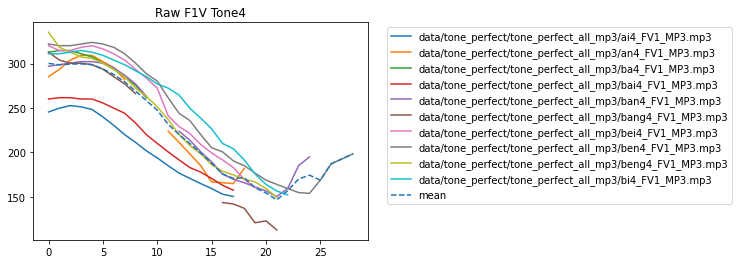

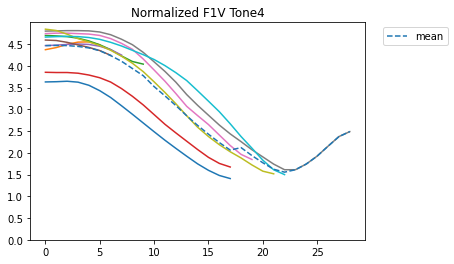

In [6]:
single_speaker_tone(1, 4, 'F')

[         nan 201.15858821 167.21064166 166.24757923 170.13343219
 175.11872228 176.13317472 174.11011266 170.13343219 163.39154532
 154.22108254 147.25670581 139.79699342 134.25725028 124.54496224
 121.70035137 120.30250361 109.05077327 106.56005016 111.59971426
 137.39536475          nan          nan 140.60682916 135.81724438
 138.191288  ]
[0.17653061 0.01000002 0.17653061 0.2065068  0.03489743 0.54852505
 0.98487898 0.48498681 0.12793709 0.01082446 0.01025905 0.01003777
 0.01240312 0.01000618 0.01062261 0.1504646  0.04768699 0.01818738
 0.01000123 0.01000002 0.01002672 0.01000003 0.01       0.01007375
 0.02616803 0.09203757]


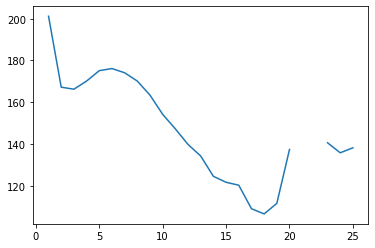

In [60]:
# WEIRD BEHAVIOUR
weird_audio = 'data/tone_perfect/tone_perfect_all_mp3/ai4_MV2_MP3.mp3'
y, sr = librosa.load(weird_audio)
f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=50, fmax=2000)
print(f0)
print(voiced_probs)
plt.plot(f0, label=weird_audio)
# plt.savefig('anomaly_a4_MV3.png')
plt.show()

In [51]:
print(librosa.note_to_hz('C2')) 
print(librosa.note_to_hz('C7'))

65.40639132514966
2093.004522404789


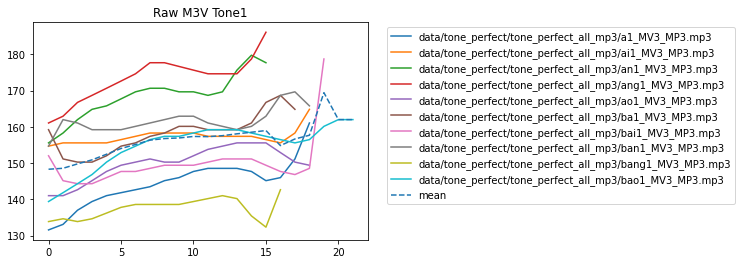

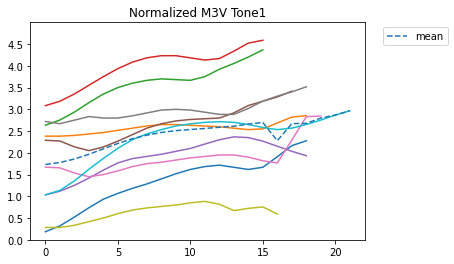

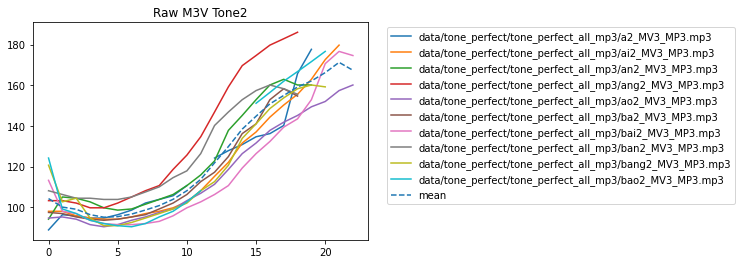

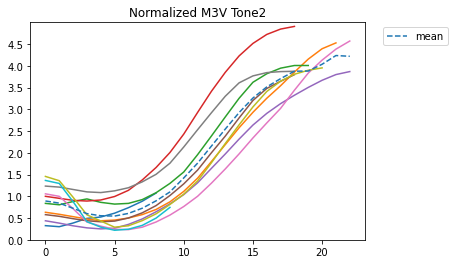

IndexError: index 14 is out of bounds for axis 0 with size 14

In [10]:
single_speaker_tone(3, 1, 'M')
single_speaker_tone(3, 2, 'M')
# single_speaker_tone(3, 3, 'M')

In [45]:
single_speaker_tone(1, 4, 'M')

[]


AxisError: axis 1 is out of bounds for array of dimension 1

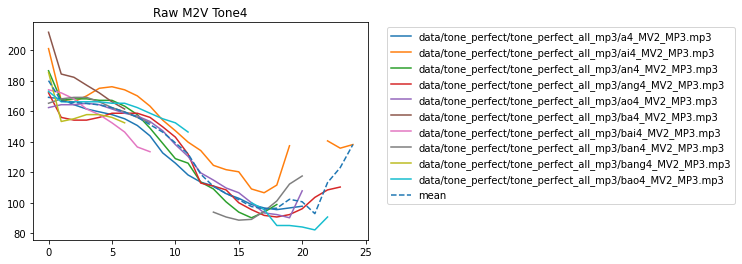

/tmp/ipykernel_4461/1693287038.py:46: RuntimeWarning: Mean of empty slice
  mean_tone1_normalized = np.nanmean(np.array(list(zip_longest(*tone1_normalized)),dtype=float),axis=1)


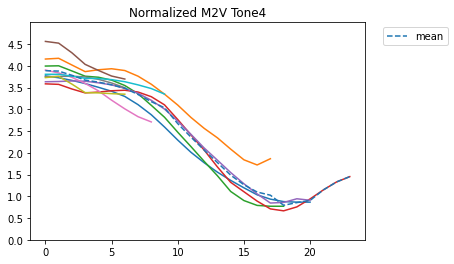

In [67]:
single_speaker_tone(2, 4, 'M')


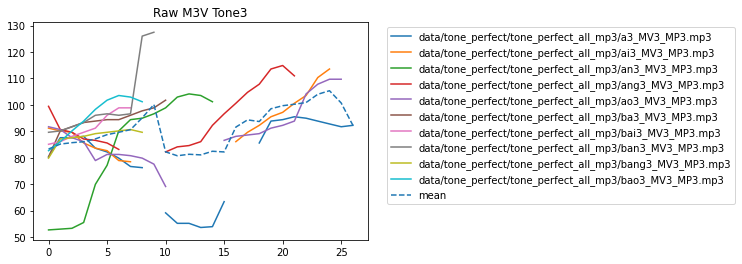

/tmp/ipykernel_4461/1693287038.py:46: RuntimeWarning: Mean of empty slice
  mean_tone1_normalized = np.nanmean(np.array(list(zip_longest(*tone1_normalized)),dtype=float),axis=1)


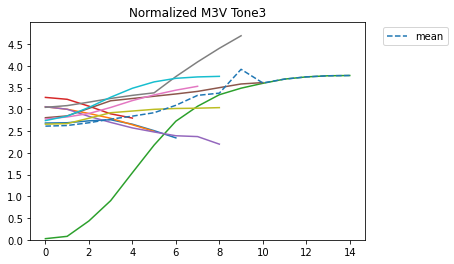

In [69]:
single_speaker_tone(3, 3, 'M')